In [1]:
import pandas as pd
import matplotlib.pyplot as plt

wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(wood_rankings.head())
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(steel_rankings.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

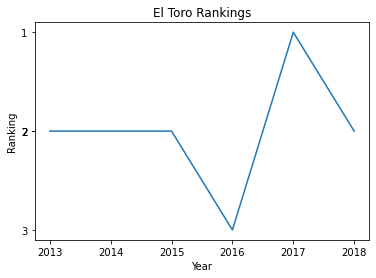

In [4]:
def plot_coaster_ranking(coaster_name, park_name, rankings_df):
  coaster_rankings = rankings_df[(rankings_df['Name'] == coaster_name) & (rankings_df['Park'] == park_name)]
  fig, ax = plt.subplots()
  ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'])
  ax.set_yticks(coaster_rankings['Rank'].values)
  ax.set_xticks(coaster_rankings['Year of Rank'].values)
  ax.invert_yaxis()
  plt.title("{} Rankings".format(coaster_name))
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.show()

plot_coaster_ranking('El Toro', 'Six Flags Great Adventure', wood_rankings)

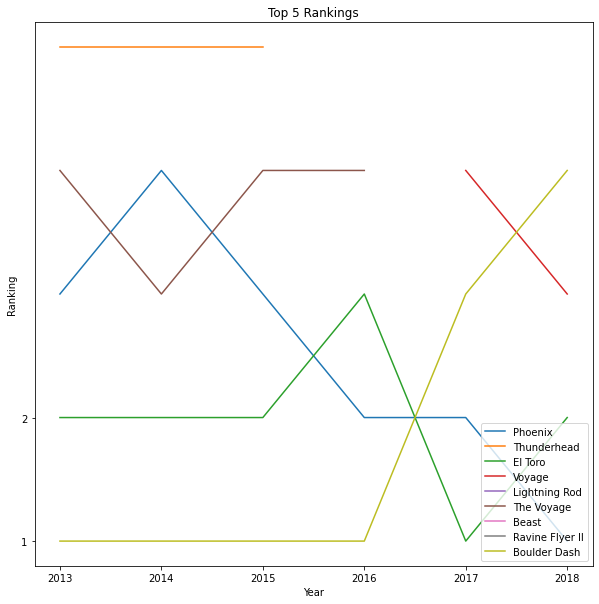

In [13]:
def plot_top_n(rankings_df,n):
  top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(10,10))
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
  ax.set_yticks([i for i in range(1,3)])
 
  plt.title("Top {} Rankings".format(n))
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

plot_top_n(wood_rankings,5)

In [14]:
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


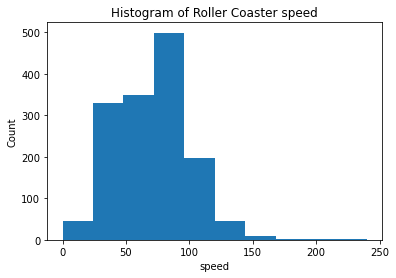

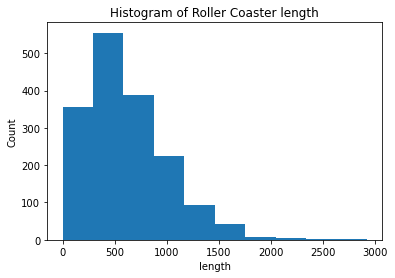

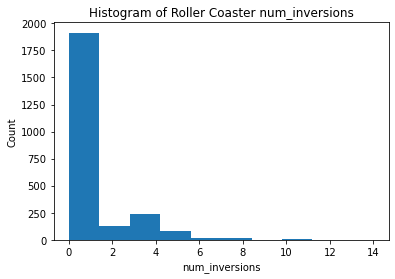

In [17]:
def plot_histogram(coaster_df, column_name):
  plt.hist(coaster_df[column_name].dropna())
  plt.title('Histogram of Roller Coaster {}'.format(column_name))
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.show()

plot_histogram(roller_coasters, 'speed')
plot_histogram(roller_coasters, 'length')
plot_histogram(roller_coasters, 'num_inversions')

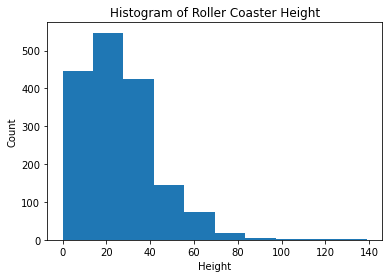

In [20]:
def plot_height_histogram(coaster_df):
  heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

plot_height_histogram(roller_coasters)

<ipython-input-21-16c7b03a7835>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


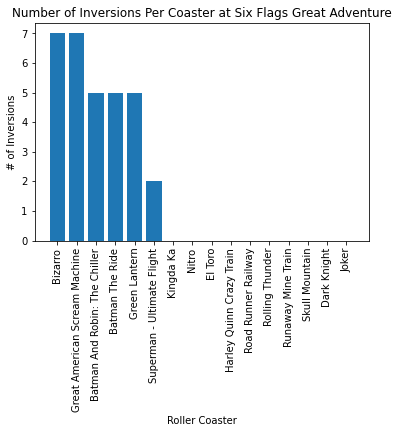

In [21]:
def plot_inversions_by_coaster(coaster_df, park_name):
  park_coasters = coaster_df[coaster_df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('# of Inversions')
  plt.show()

plot_inversions_by_coaster(roller_coasters, 'Six Flags Great Adventure')

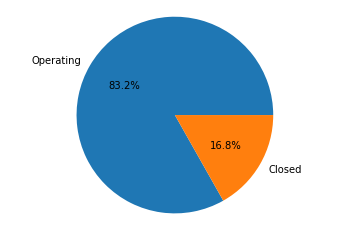

In [22]:
def pie_chart_status(coaster_df):
  operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
  closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
  num_operating_coasters = len(operating_coasters)
  num_closed_coasters = len(closed_coasters)
  status_counts = [num_operating_coasters,num_closed_coasters]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.show()

pie_chart_status(roller_coasters)

In [23]:
def plot_scatter(coaster_df, column_x, column_y):
  plt.scatter(coaster_df[column_x],coaster_df[column_y])
  plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
  plt.xlabel(column_x)
  plt.ylabel(column_y)
  plt.show()

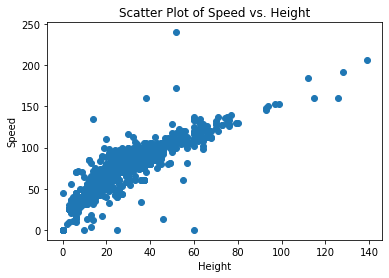

In [24]:
def plot_scatter_height_speed(coaster_df):
  coaster_df = coaster_df[coaster_df['height'] < 140]
  plt.scatter(coaster_df['height'],coaster_df['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()

plot_scatter_height_speed(roller_coasters)